In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", low_memory=False)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df['Date'] = pd.to_datetime(df['Date']) # The data is changed to datetime var type
df.head()

The dataset has 318477 rows and 13 columns.


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## Classifications

Text(0, 0.5, 'Classification')

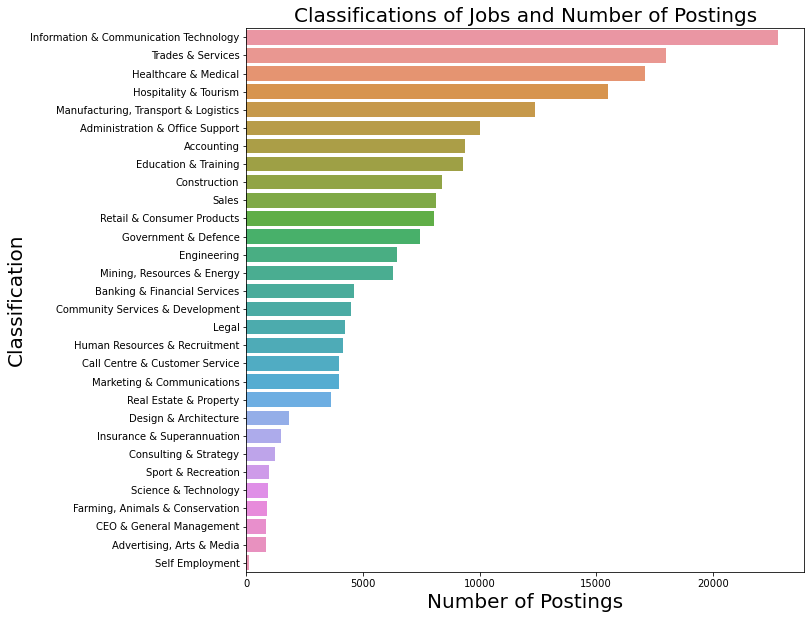

In [15]:
by_class = df.groupby(['Classification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_class, x=by_class.Id, y=by_class.Classification)
plt.title("Classifications of Jobs and Number of Postings",size=20)
plt.xlabel("Number of Postings",size=20)
plt.ylabel("Classification",size=20)

## Sub Classifications

Text(0, 0.5, 'SubClassification')

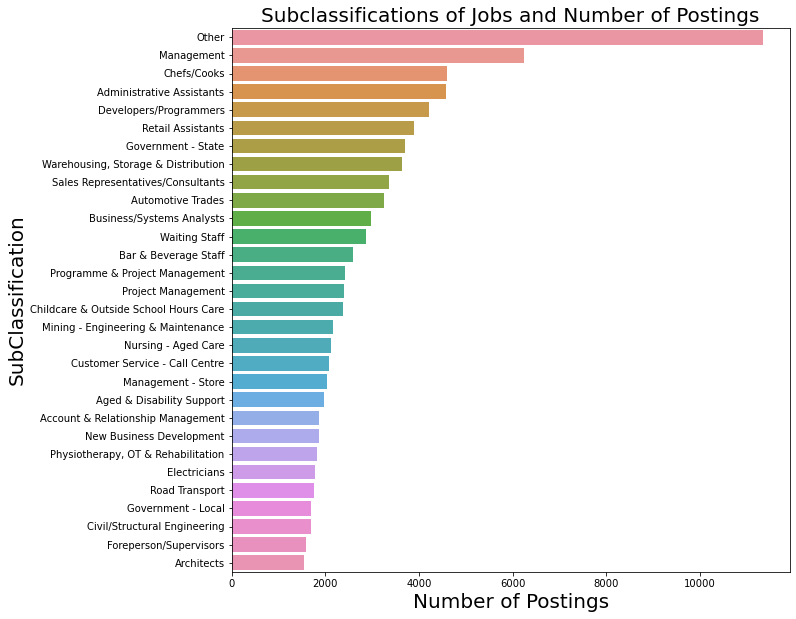

In [23]:
by_Subclass = df.groupby(['SubClassification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
by_Subclass = by_Subclass[:30]
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_Subclass, x=by_Subclass.Id, y=by_Subclass.SubClassification)
plt.title("Subclassifications of Jobs and Number of Postings",size=20)
plt.xlabel("Number of Postings",size=20)
plt.ylabel("SubClassification",size=20)

## Locations

In [29]:
%matplotlib inline
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

#Sort by descending to have the top 5 Cities at the top
locationDf = locationDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = locationDf[:5].copy()
#Add a new row that will be all of the countries under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Location' : ['others'],
                              'Count' : [locationDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
locationDf = pd.concat([df2, new_row])
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,Melbourne,46690
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,Adelaide,6653


Text(0.5, 1.0, 'Market share of locations')

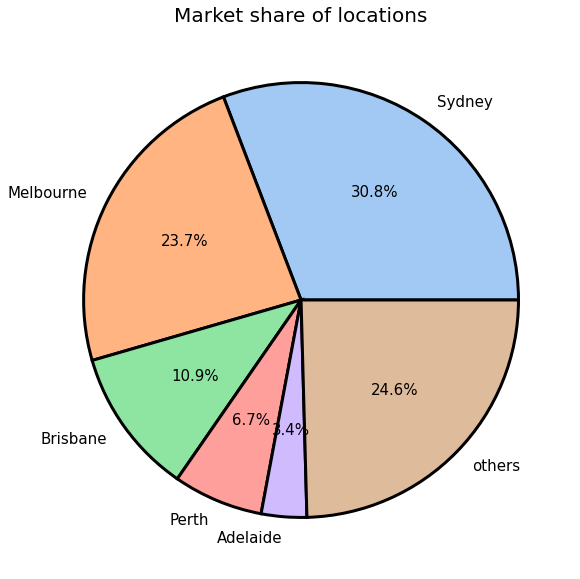

In [38]:
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(10, 10))
plt.pie(data=locationDf, x=locationDf.Count, labels=locationDf.Location, colors=colors, autopct='%0.1f%%', 
        textprops={'fontsize': 15}, wedgeprops={'edgecolor':'black','linewidth':3})
plt.title("Market share of locations",size=20)

## Jobs by Salary Range

In [42]:
by_lowSal = df.groupby(['LowestSalary'], as_index=False).count()
by_lowSal['labels'] = by_lowSal['LowestSalary']

by_HighSal = df.groupby(['HighestSalary'], as_index=False).count()
by_HighSal['labels'] = by_HighSal['LowestSalary']

Text(0.5, 1.0, 'Job Posts by Highest Salary')

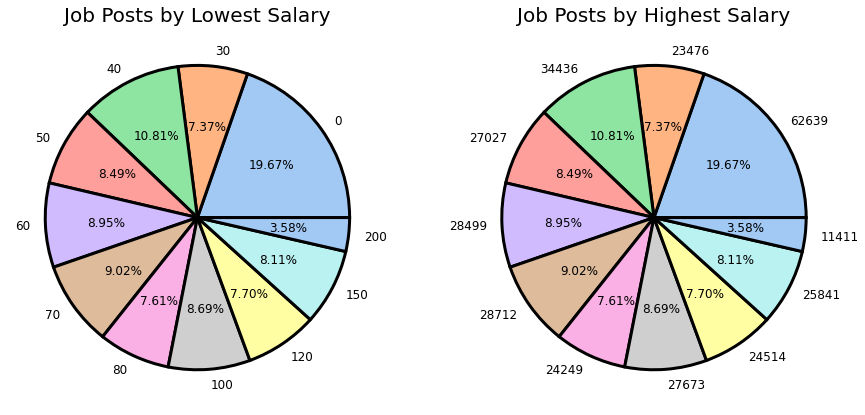

In [55]:
colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=by_lowSal, x=by_lowSal.Id, labels=by_lowSal.labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})
plt.title("Job Posts by Lowest Salary", size=20)

# colors = sns.color_palette('pastel')
# fig = plt.figure(figsize=(10, 10))
plt.subplot(122)
plt.pie(data=by_lowSal, x=by_HighSal.Id, labels=by_HighSal.labels, colors=colors, autopct='%0.2f%%',
       wedgeprops={'edgecolor':'black','linewidth':3}, textprops={'fontsize': 12})
plt.title("Job Posts by Highest Salary", size=20)